In [ ]:
from __future__ import print_function

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Machine Learning

_Machine learning_ is the science of getting computers to act without telling them to do so. This is where we have got our self-driving cars, effective web search, speech recognition etc. You use it everyday without even realizing it! 

So today we will try to go into some of the primary wings of machine learning using Python through examples:

- Supervised learning: Learning based on the examples
    - Regression
    - Classification

- Unsupervised learning: 
    - Clustering
    - Expectation Maximization

** A representation of the classifiers in scikit-learn **

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA
%matplotlib inline
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(20, 7))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

**Representing data in scikit-learn**

Most machine learning algorithms implemented in scikit-learn expect data to be stored in a two-dimensional array or matrix. The arrays can be either numpy arrays, or in some cases scipy.sparse matrices. The size of the array is expected to be [n_samples, n_features]

- `n_samples`: Each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

- `n_features`: The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases. The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. This is a case where scipy.sparse matrices can be useful, in that they are much more memory-efficient than numpy arrays.

**Loading a dataset**

Before we begin with machine learning, let's start at its very root by understanding how to load a dataset. We are going to start with the `iris` dataset stored in `scikit-learn`. It can be visualized as follows:

In [ ]:
from IPython.core.display import Image, display
display(Image('http://www.twofrog.com/images/iris38a.jpg'))
print ("Iris Setosa\n")

display(Image('http://www.gatewaygardens.com/_ccLib/image/plants/DETA-185.jpg'))
print ("Iris Versicolor\n")

display(Image('http://mirlab.org/jang/books/dcpr/image/Iris-virginica-3_1.jpg'))
print ("Iris Virginica")



**Question**
If we want to design an algorithm to recognize iris species, what might the data be?
(Remember: we need a 2D array of size [`n_samples` x `n_features`].)

- What would the `n_samples` refer to?
- What might the `n_features` refer to?

Remember that there must be a fixed number of features for each sample, and feature number `i` must be a similar kind of quantity for each sample.

Scikit-learn has a very straightforward set of data on these iris species. The data consists of the following:

Features in the Iris dataset:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

Target classes to predict:

- Iris Setosa
- Iris Versicolour
- Iris Virginica

`scikit-learn` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris() #150 observations of the iris flower with sepal length, sepal width, petal length and petal width

The data is stored in the `.data` attribute

In [ ]:
#iris.data.shape
#iris.target_names
iris.feature_names

In [ ]:
iris.keys()

This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot:

In [ ]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

---
# Learning

## Supervised Learning

In supervised learning, the computer gets presented with a set of sample data (or "training" data as it is called) along with its output. The idea is to develop a rule or a model that maps the sample output to the input. So, when the computer is presented with a new input, it can classify it into a particular category. For example, spam filtering is an instance where the learning algorithm is presented with emails messages labeled beforehand as "spam" or "not spam", to produce a computer program that labels unseen messages as either spam or not.

Essentially we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. 

Supervised learning is further broken down into two categories, **classification** and **regression**. In classification, the label is discrete, while in regression, the label is continuous.

 `scikit-learn` supports a number of supervised learning  algorithms, and we will try to elucidate using examples using the following:

- KNN (K Nearest Neighbours)
- Linear Regression
- Support Vector Machines


### Classification

The figure shows a collection of two-dimensional data, colored according to two different class labels. A classification algorithm may be used to draw a dividing boundary between the two clusters of points:

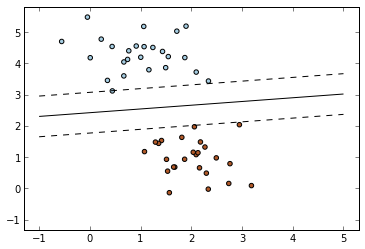

**KNN Classifier**

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [ ]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

print(len(y))

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=30)

# fit the model
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
# call the "predict" method:
result = knn.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

### Evaluate the results of the classifier

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Size of train data:{0}\nSize of test data: {1}'.format(X_train.shape, X_test.shape))

In [ ]:
#fit training data
knn.fit(X_train, y_train)

# Make predicition on test data
y_pred = knn.predict(X_test)

#### Plot confution matrix

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

In [ ]:
#plot confusion matrix
import itertools

fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(conf_mat, interpolation='nearest')

classes = iris.target_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, fontsize=16)
plt.yticks(tick_marks, classes, fontsize=16)

for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, conf_mat[i, j],
                 horizontalalignment="center")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

### Report classification statistics

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

### Exercise: Apply knn classifier to the digits dataset 

In [ ]:
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

Digits dataset stores an image representation of the handwritten digits with their approrpitae labels

In [ ]:
idx = 306
plt.imshow(X_digits[idx].reshape(8,8))
plt.title(y_digits[idx])
plt.show()

Split the dataset into train and test datasets

Fit data to a knn classifier

Make prediction

Report classification metrics

Calculate confusion matrix

Plot confusion matrix

**Support Vector Machines (SVM)**

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg" style="width: 500px;"/>





They are particularly advantageous in the following situations :

- High dimensional spaces
- Number of dimensions greater than the number of samples
- Memory efficient
- Versatile


The support vector machines in `scikit-learn` support both dense (`numpy.ndarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. 

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
X, y = iris.data, iris.target
clf.fit(X, y) #learn from the data

In [ ]:
clf.predict([[ 5.0,  3.6,  1.3,  0.25]])

In [ ]:
clf.coef_   #Access the coefficients

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
X, y = iris.data, iris.target
svc=svc.fit(X, y)

In [ ]:
svc.coef_

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

mpl.rcParams['figure.figsize']=[12,12]
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### Exercise: Apply SVM to digits dataset and report classification report

In [ ]:
from sklearn.cross_validation import train_test_split

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)
print('Size of train data:{0}\nSize of test data: {1}'.format(X_train.shape, X_test.shape))

Fit training data to Linear SVM and report confusion matrix. You don't have to plot it

Repeat previous exercise with SVM with polynomial kernel of the order 2.

Repeat previous exercise with SVM with RBF kernel.

## Principal Component Analysis(PCA)

PCA is extensively used in reducing dimensionality of data. PCA finds the directions in which the data is not flat and it can reduce the dimensionality of the data by projecting on a subspace. It finds the combination of variables that exhibit the maximum variance

![](http://shapeofdata.files.wordpress.com/2013/02/pca22.png)

In [ ]:
mpl.rcParams['figure.figsize']=[12,5]
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'og')
plt.axis('equal')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

In [ ]:
mpl.rcParams['figure.figsize']=[12,5]
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.3)
plt.axis('equal')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)

In [ ]:
clf = PCA(0.95) # if we only keep 95% of the variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

In [ ]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'og', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'og', alpha=0.8)
plt.axis('equal');

In [ ]:
X, y = iris.data, iris.target
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print ("Reduced dataset shape:", X_reduced.shape)

import pylab as pl
mpl.rcParams['figure.figsize']=[12,3]
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)

print ("Meaning of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

## Unsupervised learning

In the case of unsupervised learning, the idea is to find a hidden pattern in the data. In a sense, you can think of unsupervised learning as a means of discovering labels from the data itself. Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation. 
Approaches to unsupervised learning are supported in `scikit-learn` such as:

- K-means clustering
- Principal Component Analysis
- Neural networks

## Clustering

It is the task of grouping a set of objects together such as they are similar to one another in some way.

## K-means

The simplest clustering algorithm is k-means. This divides a set into k clusters, assigning each observation to a cluster so as to minimize the distance of that observation (in n-dimensional space) to the cluster’s mean; the means are then recomputed. This operation is run iteratively until the clusters converge, for a maximum for max_iter rounds.

In [ ]:
X, y = iris.data, iris.target
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred);


In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

### Exercise: K-Means clustering on digits dataset


In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

Splint dataset into test and train datasets and user train to train your clustering method

First, find the primary components. In this example use 10 primary in your PCA

#### Report and plot confusion matrix

Classification metrics do not work for clustering.

In [ ]:
from sklearn.metrics import completeness_score, homogeneity_score

print('Completeness score: {0:.2f}, Homogenity score: {1:.2f}'.format(completeness_score(y_test, y_pred), homogeneity_score(y_test, y_pred)))

Add following options to k-mean class at initialization `k_means = init=pca.components_, n_clusters=n_digits, n_init=1` nd rerun this example

**Neural Networks**

In general Neural Networks or Artificial Neural Networks(ANNs) as they are commonly known, are used both in machine learning and pattern recognition.

For example, a neural network for handwriting recognition is defined by a set of input neurons which may be activated by the pixels of an input image. After being weighted and transformed by a function (determined by the network's designer), the activations of these neurons are then passed on to other neurons. This process is repeated until finally, an output neuron is activated. This determines which character was read.

Typically, the ANN is represented by three layers. The hidden layer's job is to transform the inputs into something that the output layer can use. The output of a neuron is a function of the weighted sum of the inputs plus a bias.

![](http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/img/example_network.svg)

A restricted Boltzmann machine (RBM) is a generative stochastic artificial neural network that can learn a probability distribution over its set of inputs. This is the example of unsupervised learning which is supported by `scikit-learn`.

### Some Real World Examples

**Image compression using clustering**

In [ ]:
from sklearn.datasets import load_sample_image
c1= load_sample_image("china.jpg")
plt.imshow(c1);

In [ ]:
import scipy.misc as misc
from sklearn.datasets import load_sample_image
c = load_sample_image("china.jpg")
#plt.imshow(c)
c = c.astype(np.float32)
#plt.imshow(c)
X = c.reshape((-1, 1)) # Reshaping it into an array
k_means = KMeans(n_clusters=5)
k_means.fit(X)

In [ ]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
c_compressed = np.choose(labels, values)
c_compressed.shape = c.shape

In [ ]:
mpl.rcParams['figure.figsize']=[12,5.5]
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True)
ax0.imshow(c)
ax1.imshow(c_compressed) 
fig.show()

**K-means clustering on PCA reduced Data**

In [ ]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(79 * '_')
print('% 9s' % 'init'
      '    time  inertia    homo   compl  v-meas     ARI AMI  silhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(79 * '_')

###############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()


#### A clustering example from the real world

In [ ]:
# Author: Gael Varoquaux gael.varoquaux@normalesup.org
# License: BSD 3 clause

import datetime

import numpy as np
import matplotlib.pyplot as plt
try:
     from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
     # quotes_historical_yahoo_ochl was named quotes_historical_yahoo before matplotlib 1.4
     from matplotlib.finance import quotes_historical_yahoo as quotes_historical_yahoo_ochl
from matplotlib.collections import LineCollection
from sklearn import cluster, covariance, manifold

###############################################################################
# Retrieve the data from Internet

# Choose a time period reasonnably calm (not too long ago so that we get
# high-tech firms, and before the 2008 crash)
d1 = datetime.datetime(2003, 1, 1)
d2 = datetime.datetime(2008, 1, 1)

# kraft symbol has now changed from KFT to MDLZ in yahoo
symbol_dict = {
    'TOT': 'Total',
    'XOM': 'Exxon',
    'CVX': 'Chevron',
    'COP': 'ConocoPhillips',
    'VLO': 'Valero Energy',
    'MSFT': 'Microsoft',
    'IBM': 'IBM',
    'TWX': 'Time Warner',
    'CMCSA': 'Comcast',
    'CVC': 'Cablevision',
    'YHOO': 'Yahoo',
    'DELL': 'Dell',
    'HPQ': 'HP',
    'AMZN': 'Amazon',
    'TM': 'Toyota',
    'CAJ': 'Canon',
    'MTU': 'Mitsubishi',
    'SNE': 'Sony',
    'F': 'Ford',
    'HMC': 'Honda',
    'NAV': 'Navistar',
    'NOC': 'Northrop Grumman',
    'BA': 'Boeing',
    'KO': 'Coca Cola',
    'MMM': '3M',
    'MCD': 'Mc Donalds',
    'PEP': 'Pepsi',
    'MDLZ': 'Kraft Foods',
    'K': 'Kellogg',
    'UN': 'Unilever',
    'MAR': 'Marriott',
    'PG': 'Procter Gamble',
    'CL': 'Colgate-Palmolive',
    'GE': 'General Electrics',
    'WFC': 'Wells Fargo',
    'JPM': 'JPMorgan Chase',
    'AIG': 'AIG',
    'AXP': 'American express',
    'BAC': 'Bank of America',
    'GS': 'Goldman Sachs',
    'AAPL': 'Apple',
    'SAP': 'SAP',
    'CSCO': 'Cisco',
    'TXN': 'Texas instruments',
    'XRX': 'Xerox',
    'LMT': 'Lookheed Martin',
    'WMT': 'Wal-Mart',
    'WBA': 'Walgreen',
    'HD': 'Home Depot',
    'GSK': 'GlaxoSmithKline',
    'PFE': 'Pfizer',
    'SNY': 'Sanofi-Aventis',
    'NVS': 'Novartis',
    'KMB': 'Kimberly-Clark',
    'R': 'Ryder',
    'GD': 'General Dynamics',
    'RTN': 'Raytheon',
    'CVS': 'CVS',
    'CAT': 'Caterpillar',
    'DD': 'DuPont de Nemours'}

symbols, names = np.array(list(symbol_dict.items())).T

quotes = [quotes_historical_yahoo_ochl(symbol, d1, d2, asobject=True)
          for symbol in symbols]

open = np.array([q.open for q in quotes]).astype(np.float)
close = np.array([q.close for q in quotes]).astype(np.float)

# The daily variations of the quotes are what carry most information
variation = close - open

###############################################################################
# Learn a graphical structure from the correlations
edge_model = covariance.GraphLassoCV()

# standardize the time series: using correlations rather than covariance
# is more efficient for structure recovery
X = variation.copy().T
X /= X.std(axis=0)
edge_model.fit(X)

###############################################################################
# Cluster using affinity propagation

_, labels = cluster.affinity_propagation(edge_model.covariance_)
n_labels = labels.max()

for i in range(n_labels + 1):
    print('Cluster %i: %s' % ((i + 1), ', '.join(names[labels == i])))

###############################################################################
# Find a low-dimension embedding for visualization: find the best position of
# the nodes (the stocks) on a 2D plane

# We use a dense eigen_solver to achieve reproducibility (arpack is
# initiated with random vectors that we don't control). In addition, we
# use a large number of neighbors to capture the large-scale structure.
node_position_model = manifold.LocallyLinearEmbedding(
    n_components=2, eigen_solver='dense', n_neighbors=6)

embedding = node_position_model.fit_transform(X.T).T

###############################################################################
# Visualization
plt.figure(1, facecolor='w', figsize=(10, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])
plt.axis('off')

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Plot the nodes using the coordinates of our embedding
plt.scatter(embedding[0], embedding[1], s=100 * d ** 2, c=labels,
            cmap=plt.cm.spectral)

# Plot the edges
start_idx, end_idx = np.where(non_zero)
#a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[embedding[:, start], embedding[:, stop]]
            for start, stop in zip(start_idx, end_idx)]
values = np.abs(partial_correlations[non_zero])
lc = LineCollection(segments,
                    zorder=0, cmap=plt.cm.hot_r,
                    norm=plt.Normalize(0, .7 * values.max()))
lc.set_array(values)
lc.set_linewidths(15 * values)
ax.add_collection(lc)

# Add a label to each node. The challenge here is that we want to
# position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(
        zip(names, labels, embedding.T)):

    dx = x - embedding[0]
    dx[index] = 1
    dy = y - embedding[1]
    dy[index] = 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .002
    else:
        horizontalalignment = 'right'
        x = x - .002
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .002
    else:
        verticalalignment = 'top'
        y = y - .002
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment,
             bbox=dict(facecolor='w',
                       edgecolor=plt.cm.spectral(label / float(n_labels)),
                       alpha=.6))

plt.xlim(embedding[0].min() - .15 * embedding[0].ptp(),
         embedding[0].max() + .10 * embedding[0].ptp(),)
plt.ylim(embedding[1].min() - .03 * embedding[1].ptp(),
         embedding[1].max() + .03 * embedding[1].ptp())

plt.show()

**Digit Classification using Neural Networks**

In [ ]:
from __future__ import print_function

print(__doc__)

# Authors: Yann N. Dauphin, Vlad Niculae, Gabriel Synnaeve
# License: BSD

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import convolve
from sklearn import linear_model, datasets, metrics
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline


###############################################################################
# Setting up

def nudge_dataset(X, Y):
    """
    This produces a dataset 5 times bigger than the original one,
    by moving the 8x8 images in X around by 1px to left, right, down, up
    """
    direction_vectors = [
        [[0, 1, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [1, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 1],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 1, 0]]]

    shift = lambda x, w: convolve(x.reshape((8, 8)), mode='constant',
                                  weights=w).ravel()
    X = np.concatenate([X] +
                       [np.apply_along_axis(shift, 1, X, vector)
                        for vector in direction_vectors])
    Y = np.concatenate([Y for _ in range(5)], axis=0)
    return X, Y

# Load Data
digits = datasets.load_digits()
X = np.asarray(digits.data, 'float32')
X, Y = nudge_dataset(X, digits.target)
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=0)

# Models we will use
logistic = linear_model.LogisticRegression()
rbm = BernoulliRBM(random_state=0, verbose=True)

classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

###############################################################################
# Training

# Hyper-parameters. These were set by cross-validation,
# using a GridSearchCV. Here we are not performing cross-validation to
# save time.
rbm.learning_rate = 0.06
rbm.n_iter = 20
# More components tend to give better prediction performance, but larger
# fitting time
rbm.n_components = 100
logistic.C = 6000.0

# Training RBM-Logistic Pipeline
classifier.fit(X_train, Y_train)

# Training Logistic regression
logistic_classifier = linear_model.LogisticRegression(C=100.0)
logistic_classifier.fit(X_train, Y_train)

###############################################################################
# Evaluation

print()
print("Logistic regression using RBM features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        classifier.predict(X_test))))

print("Logistic regression using raw pixel features:\n%s\n" % (
    metrics.classification_report(
        Y_test,
        logistic_classifier.predict(X_test))))

###############################################################################
# Plotting

plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()

**References**


- [scikit-learn Documentation](http://scikit-learn.org/stable/)
- [Machine Learning using Astronomical Data](http://www.astroml.org/)
- [scikit-learn tutorial](http://www.astroml.org/sklearn_tutorial/)
- [Stock Market Example](http://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#example-applications-plot-stock-market-py)
- [PyCon14](http://nbviewer.ipython.org/github/jakevdp/sklearn_pycon2014/blob/master/notebooks/04_supervised_in_depth.ipynb)

---
## Credits

Lakshmi Rao, Abhishek Sharma, and Neal Davis developed these materials for [Computational Science and Engineering](http://cse.illinois.edu/) at the University of Illinois at Urbana–Champaign.

<img src="http://i.creativecommons.org/l/by/3.0/88x31.png" align="left">
This content is available under a [Creative Commons Attribution 3.0 Unported License](https://creativecommons.org/licenses/by/3.0/).

[![](https://bytebucket.org/davis68/resources/raw/f7c98d2b95e961fae257707e22a58fa1a2c36bec/logos/baseline_cse_wdmk.png?token=be4cc41d4b2afe594f5b1570a3c5aad96a65f0d6)](http://cse.illinois.edu/)